In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [3]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housing[varlist] = housing[varlist].apply(binary_map)
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [4]:
np.random.seed(0)
X_train, X_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
scaler = MinMaxScaler()

In [5]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [6]:
X = np.sort(X_train, axis=0)
y = X_train.pop('price')

In [7]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

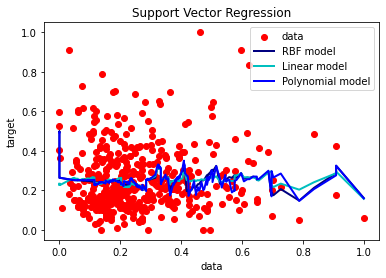

In [9]:
lw = 2
plt.scatter(X[:, 0], y, color='red', label='data')
plt.plot(X[:, 0], y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X[:, 0], y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X[:, 0], y_poly, color='blue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()